# A4 Temperature sensor
by H cyan

huangzw29@mail2.sysu.edu.cn

2021.6.3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

## EXP1 Cu50 sensor

In [16]:
df1 = pd.read_csv('A4 data\Cu50.csv')
df1['R'] = (df1['R1']+df1['R2'])/2
df1['R'] = df1['R'].round(3)
df1

,t,R1,R2,R
0,0,51.435,50.707,51.071
1,5,51.989,51.926,51.957
2,10,52.922,53.137,53.030
3,15,53.894,53.540,53.717
4,20,54.910,53.925,54.418
5,25,56.028,55.017,55.522
6,30,56.926,56.053,56.490
7,35,57.625,57.187,57.406
8,40,58.059,58.252,58.156
9,45,58.809,59.307,59.058


Text(0.5, -0.25, 'fig. 1 Measure temperature with Cu50 temperature sensor.')

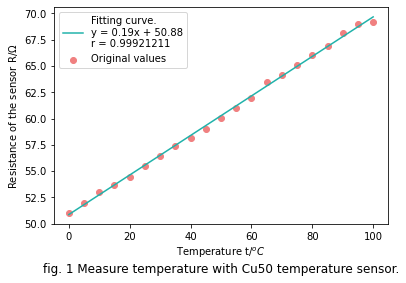

In [4]:
plt.scatter(df1['t'], df1['R'], color='lightcoral', label='Original values')

Cu_func = np.polyfit(df1['t'], df1['R'], deg=1)
t_smooth = np.linspace(0, 100, 500)
R_reg = np.polyval(Cu_func, t_smooth)

r = np.corrcoef(df1['t'], df1['R'])[0,1]
A1, A2 = tuple(Cu_func)
plt.plot(t_smooth, R_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.2f}x + {:.2f}\nr = {:.8f}'
                          .format(A1, A2, r))

plt.legend()

plt.xlabel('Temperature t/$^oC$')
plt.ylabel('Resistance of the sensor R/$\Omega$')
plt.title('fig. 1 Measure temperature with Cu50 temperature sensor.', y=-0.25)
# plt.savefig(r'A4 output\fig. 1.png', bbox_inches = 'tight', dpi=300)

### OLS

In [5]:
x = df1['t']
Y = np.matrix(df1['R']).T
X = np.matrix(np.column_stack((x**0, x)))

par = ((X.T@X).I)@X.T@Y
print(par)
print('A={}'.format(par[1]/par[0]))

[[50.8785 ]
 [ 0.18791]]
A=[[0.00369331]]


## EXP2 NTC sensor

In [6]:
df2 = pd.read_csv(r'A4 data\NTC.csv')
df2['R'] = (df2['R1']+df2['R2'])/2
df2['1/T'] = 1/(df2['t']+273.15)
df2['lnR'] = np.log(df2['R1'])
df2

,t,R1,R2,R,1/T,lnR
0,0,7.679300,7.571200,7.625250,0.003661,2.038528
1,5,6.965600,6.680200,6.822900,0.003595,1.940984
2,10,5.773500,5.316200,5.544850,0.003532,1.753278
3,15,4.717300,4.245630,4.481465,0.003470,1.551237
4,20,3.849230,3.230140,3.539685,0.003411,1.347873
5,25,3.170450,2.675210,2.922830,0.003354,1.153874
6,30,2.633560,2.456040,2.544800,0.003299,0.968337
7,35,2.401040,2.139390,2.270215,0.003245,0.875902
8,40,2.093470,1.768790,1.931130,0.003193,0.738823
9,45,1.796510,1.474120,1.635315,0.003143,0.585846


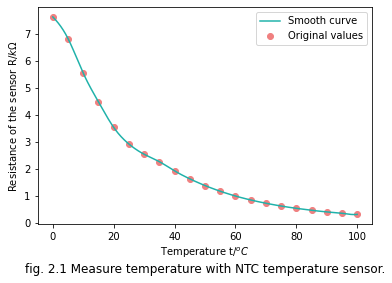

In [26]:
plt.scatter(df2['t'], df2['R'], color='lightcoral', label='Original values')
t_smooth = np.linspace(0, 100, 500)
R_smooth = Rbf(df2['t'], df2['R'])


plt.plot(t_smooth, R_smooth(t_smooth), color='lightseagreen', label='Smooth curve')
plt.xlabel('Temperature t/$^oC$')
plt.ylabel('Resistance of the sensor R/$k\Omega$')
plt.title('fig. 2.1 Measure temperature with NTC temperature sensor.', y=-0.25)
plt.legend()
# plt.savefig(r'A4 output\fig. 2.1.png', bbox_inches = 'tight', dpi=300)

###  $lnR_{NTC}-\frac{1}{T}$ curve

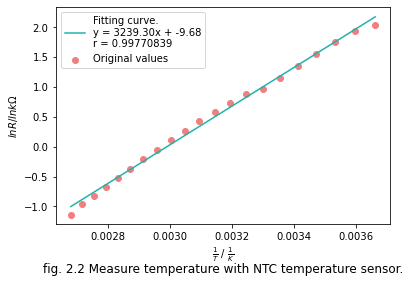

In [27]:
plt.scatter(df2['1/T'], df2['lnR'], color='lightcoral', label='Original values')

NTC_func = np.polyfit(df2['1/T'], df2['lnR'], deg=1)
t_smooth = np.linspace(df2['1/T'].min(), df2['1/T'].max(), 500)
R_reg = np.polyval(NTC_func, t_smooth)

r = np.corrcoef(df2['1/T'], df2['lnR'])[0,1]
A1, A2 = tuple(NTC_func)
plt.plot(t_smooth, R_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.2f}x + {:.2f}\nr = {:.8f}'
                          .format(A1, A2, r))

plt.legend()

plt.xlabel(r'$\frac{1}{T}$ / $\frac{1}{K}$')
plt.ylabel('$lnR / lnk\Omega$')
plt.title('fig. 2.2 Measure temperature with NTC temperature sensor.', y=-0.25)
# plt.savefig(r'A4 output\fig. 2.2.png', bbox_inches = 'tight', dpi=300)

## EXP3 PN Junction

In [21]:
df3 = pd.read_csv(r'A4 data\PN.csv')
df3['U'] = (df3['U1']+df3['U2'])/2
df3['U'] = df3['U'].round(4)
df3.iloc[:,1:4] = df3.iloc[:,1:4]*1000
df3

,t,U1,U2,U
0,0,680.9,674.5,677.7
1,5,676.2,661.7,668.9
2,10,666.4,650.0,658.2
3,15,654.7,645.2,650.0
4,20,642.8,641.2,642.0
5,25,628.5,629.9,629.2
6,30,620.8,619.3,620.0
7,35,615.1,608.2,611.6
8,40,607.6,597.0,602.3
9,45,598.6,585.9,592.2


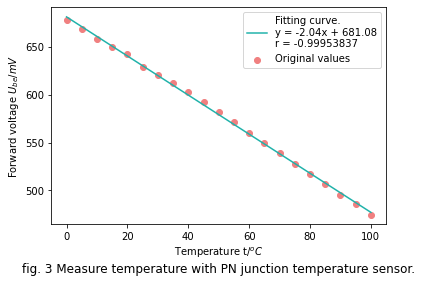

In [28]:
plt.scatter(df3['t'], df3['U'], color='lightcoral', label='Original values')

PN_func = np.polyfit(df3['t'], df3['U'], deg=1)
t_smooth = np.linspace(0, 100, 500)
R_reg = np.polyval(PN_func, t_smooth)

r = np.corrcoef(df3['t'], df3['U'])[0,1]
A1, A2 = tuple(PN_func)
plt.plot(t_smooth, R_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.2f}x + {:.2f}\nr = {:.8f}'
                          .format(A1, A2, r))

plt.legend()

plt.xlabel('Temperature t/$^oC$')
plt.ylabel('Forward voltage $U_{be}/mV$')
plt.title('fig. 3 Measure temperature with PN junction temperature sensor.', y=-0.25)
plt.savefig(r'A4 output\fig. 3.png', bbox_inches = 'tight', dpi=300)                     